In [3]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [4]:
# cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():

    df = pd.read_csv('https://github.com/KHSakib/LieVis_Dashboard/blob/main/LieVis_Result_Visualization.csv')

    pn.state.cache['data'] = df.copy()

else: 

    df = pn.state.cache['data']

In [5]:
# Make DataFrame Pipeline Interactive
idf = df.interactive()

In [6]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Accuracy', start=60, end=100, step=2, value=85)
year_slider

IntSlider(end=100, name='Accuracy', start=60, step=2, value=85)

In [7]:
# Radio buttons for CO2 measures
yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Precision', 'Recall',],
    button_type='success'
)

In [6]:
# Radio buttons for CO2 measures
menu_bar = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Precision', 'Recall',],
    button_type='success'
)

In [8]:
models = ['BERT', 'LSTM', 'BiLSTM', 'RF', 'SVM', 'GaussianNB', 'LR', 'KNeighbors']

co2_pipeline = (
    idf[
        (idf.Accuracy <= year_slider) &
        (idf.Models.isin(models))
    ]
    .groupby(['Models', 'Feature extraction', 'Performance', 'Accuracy', 'AUC of ROC'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()    .sort_values(by='Accuracy')  
    .reset_index(drop=True)
)

In [10]:
co2_plot = co2_pipeline.hvplot(x = 'Accuracy', by='Models', y=yaxis_co2,line_width=2, title="Result Visualization")
co2_plot

In [11]:
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 14, sizing_mode='stretch_width') 
co2_table

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

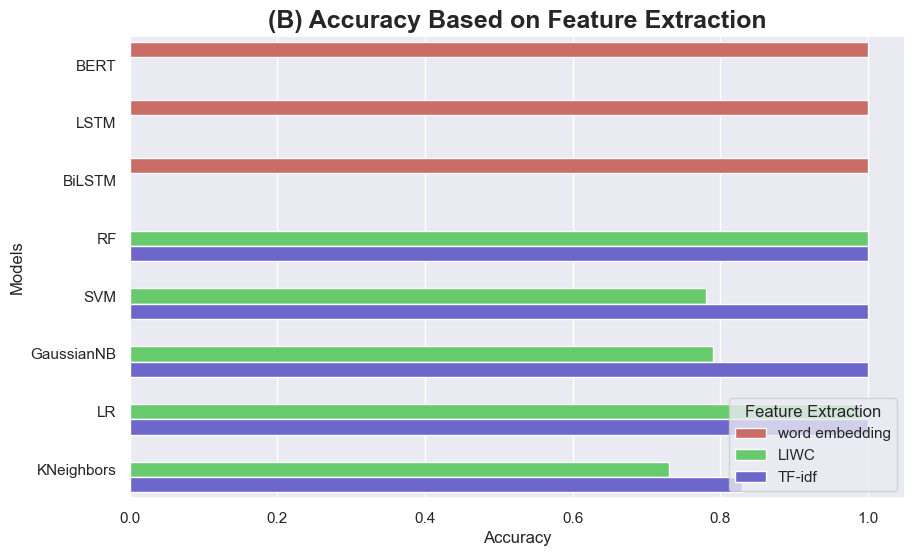

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import panel as pn
pn.extension('matplotlib')

# create example data
data = {'Models': ['BERT', 'LSTM', 'BiLSTM', 'RF', 'SVM', 'GaussianNB', 'LR', 'KNeighbors', 'RF', 'SVM', 'GaussianNB', 'LR', 'KNeighbors'],
        'Feature Extraction': ['word embedding', 'word embedding', 'word embedding', 'LIWC', 'LIWC', 'LIWC', 'LIWC', 'LIWC', 'TF-idf', 'TF-idf', 'TF-idf', 'TF-idf', 'TF-idf'],
        'accuracy': [1.0, 1.0, 1.0, 1.0, 0.78, 0.79, 0.99, 0.73, 1.0, 1.0, 1.0,1.0, 0.83]}
df1 = pd.DataFrame(data)

# create a seaborn horizontal bar plot


sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
#colors = ['#800000', '#434343', '#22EF03', '#2600E2']
sns.barplot(data=df1, x='accuracy', y='Models', hue='Feature Extraction', orient='h',palette = "hls")

# add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('(B) Accuracy Based on Feature Extraction', weight='bold').set_fontsize('18')

# create a panel with the plot
plot_pane = pn.pane.Matplotlib(plt.gcf(), dpi=144)

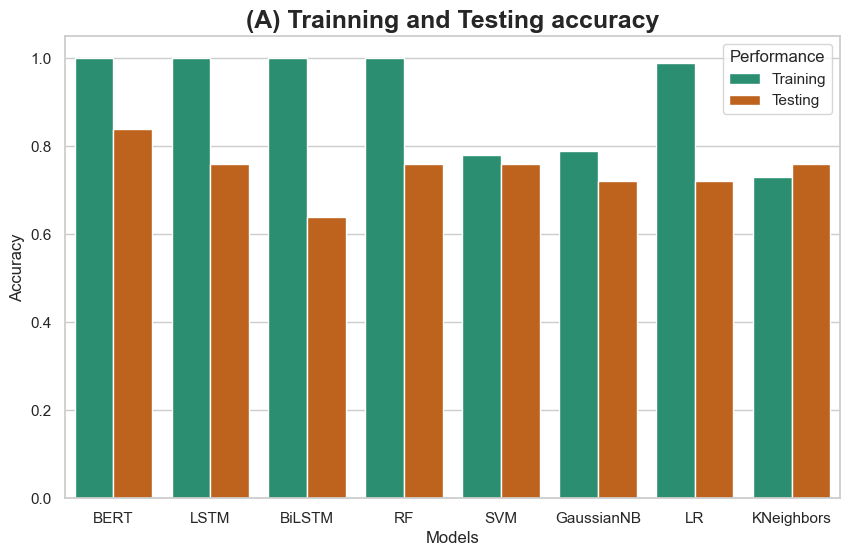

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import panel as pn
pn.extension('matplotlib')

# create example data
data = {'Models': ['BERT', 'LSTM', 'BiLSTM', 'RF', 'SVM', 'GaussianNB', 'LR', 'KNeighbors', 'BERT', 'LSTM', 'BiLSTM', 'RF', 'SVM', 'GaussianNB', 'LR', 'KNeighbors'],
        'Performance': ['Training', 'Training', 'Training', 'Training', 'Training', 'Training', 'Training', 'Training', 'Testing', 'Testing', 'Testing', 'Testing', 'Testing', 'Testing', 'Testing', 'Testing'],
        'accuracy': [1.0, 1.0, 1.0, 1.0, 0.78, 0.79, 0.99, 0.73, 0.84, 0.76, 0.64, 0.76, 0.76, 0.72, 0.72, 0.76]}
df2 = pd.DataFrame(data)

# create a seaborn vertical bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x='Models', y='accuracy', hue='Performance', orient='v', palette = "Dark2")

# add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('(A) Trainning and Testing accuracy', weight='bold').set_fontsize('18')

# create a panel with the plot
plot_pane4 = pn.pane.Matplotlib(plt.gcf(), dpi=144)

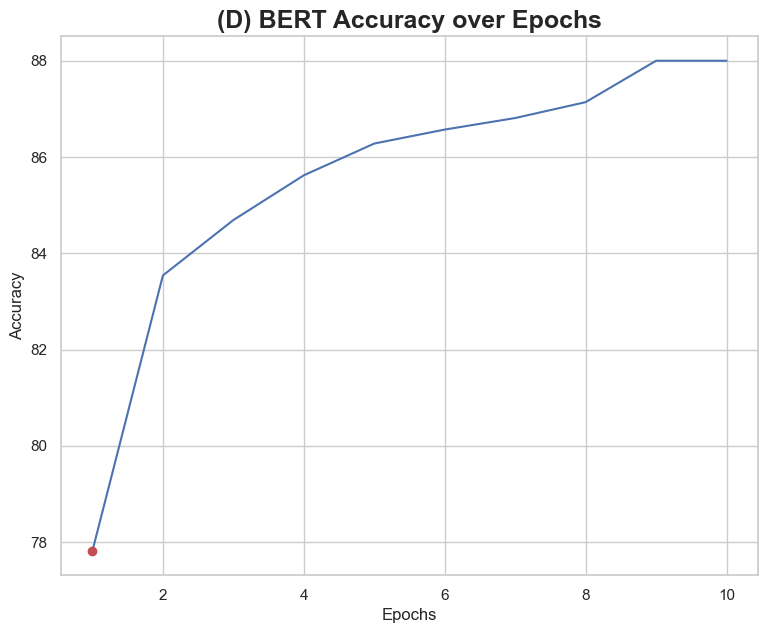

<Figure size 4500x2300 with 0 Axes>

In [30]:
import panel as pn
import matplotlib.pyplot as plt

pn.extension('matplotlib')

# create a dictionary of accuracy values for 5 models
accuracy = {
    'BERT': [77.82, 83.54, 84.69, 85.62, 86.28, 86.57, 86.81, 87.14,88.00,88.00],
       'LSTM': [84.41, 91.17, 93.39, 94.93, 96.26, 96.87, 97.74, 98.01,99.00,99.00],
       'BiLSTM': [85.52, 91.76, 94.22, 95.76, 96.96, 97.46, 97.63, 98.52,99.00,99.00],
       'RF_TF-idf': [93.25, 92.94, 97.16, 96.53, 98.17, 97.84, 98.00, 98.10,98.10,99.00],
       'SVM_TF-idf': [55.66, 55.66, 85.38, 88.73, 89.78, 90.03, 90.02, 89.99,90.00,95.00],
       'GaussianNB_TF-idf': [84.05, 84.05, 84.05, 84.05, 84.05, 84.05, 84.05, 84.05,90.00,90.00],
       'LR_TF-idf': [55.66, 55.66, 84.20, 87.16, 88.58, 89.21, 89.11, 89.11,90.00,92.00],
       'KNeighbors_TF-idf': [98.03, 92.63, 91.45, 89.82, 87.99, 87.63, 87.26, 86.84,85.06,83.00],
       'RF_LIWC': [92.02, 93.09, 97.08, 96.73, 98.33, 98.55, 99.13, 98.99,99.00,99.00],
       'SVM_LIWC': [56.07, 56.07, 68.82, 63.27, 66.14, 74.25, 74.54, 76.86,77.00,77.00],
       'GaussianNB_LIWC': [76.95, 76.95, 76.95, 76.95, 76.95, 76.95, 76.95, 76.95,77.00,78.00],
       'LR_LIWC': [78.58, 79.34, 79.24, 77.48, 77.39, 77.26, 77.46, 78.20,84.00,90.00],
       'KNeighbors_LIWC': [89.86, 85.64, 75.27, 73.18, 69.75, 71.00, 68.65, 69.87,72.00,73.50]
}

# Define a function to plot the data
def plot_accuracy(model, epoch):
    #fig, ax = plt.subplots()
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.plot(range(1, 11), accuracy[model])
    ax.plot(epoch, accuracy[model][epoch-1], 'ro')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'(D) {model} Accuracy over Epochs', weight='bold').set_fontsize('18')
    plt.figure(figsize=(45, 23))
    return fig
18
# create a dropdown widget for selecting the model
#model_widget = pn.widgets.Select(options=list(accuracy.keys()), name='Model')

# create a slider widget for selecting the epoch
epoch_slider = pn.widgets.IntSlider(start=1, end=10, value=1, name='Epoch')

# create an interactive plot using the interact function
interactive_plot = pn.interact(plot_accuracy, model=list(accuracy.keys()), epoch=epoch_slider)

# Define the panel dashboard
dashboard = pn.Column(
    '# Accuracy over Epochs',
    interactive_plot
)

# Display the dashboard
#dashboard.servable()

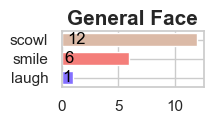

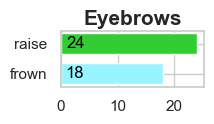

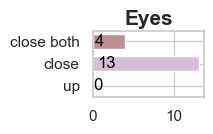

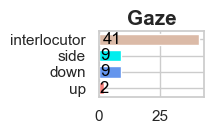

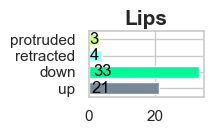

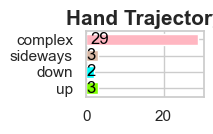

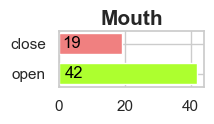

In [31]:
import panel as pn
import matplotlib.pyplot as plt

pn.extension('matplotlib')

# create a dictionary of accuracy values for deceptive and truthful faces
accuracy_face_emotions = {
    'deceptive': {
        'laugh': 1,
        'smile': 6,
        'scowl': 12
    },
    'truthful': {
        'laugh': 0,
        'smile': 9,
        'scowl': 14
    }
}

accuracy_eye_gestures = {
    'deceptive': {
        'frown': 18,
        'raise': 24
    },
    'truthful': {
        'frown': 7,
        'raise': 37
    }
}

accuracy_eyebrow_gestures = {
    'deceptive': {
        'open': 6,
        'close': 13,
        'close both': 4
    },
    'truthful': {
        'open': 7,
        'close': 35,
        'close both': 1
    }
}

accuracy_gaze_gestures = {
    'deceptive': {
        'up': 2,
        'down': 9,
        'side': 9,
        'interlocutor': 41
    },
    'truthful': {
        'up': 3,
        'down': 11,
        'side': 11,
        'interlocutor': 35
    }
}

accuracy_lips_gestures = {
    'deceptive': {
        'up': 21,
        'down': 33,
        'retracted': 4,
        'protruded': 3
    },
    'truthful': {
        'up': 7,
        'down': 52,
        'retracted': 0,
        'protruded': 1
    }
}

accuracy_hands_gestures = {
    'deceptive': {
        'up': 3,
        'down': 2,
        'sideways': 3,
        'complex': 29
    },
    'truthful': {
        'up': 16,
        'down': 2,
        'sideways': 2,
        'complex': 10
    }
}

accuracy_mouth_gestures = {
    'deceptive': {
        'open': 42,
        'close': 19
    },
    'truthful': {
        'open': 50,
        'close': 10
    }
}

# Define a function to plot the face emotions data
def plot_face_emotions_accuracy(face_type):
    fig, ax = plt.subplots(figsize=(2.3, 1.4))
    emotions = ['laugh', 'smile', 'scowl']
    values = [accuracy_face_emotions.get(face_type, {}).get(emotion, 0) for emotion in emotions]
    colors = ['#8470FF', '#f47e7a', '#dbbaa7']
    ax.barh(emotions, values, color=colors, height=0.7)
    #ax.xaxis.tick_top()  # Place x-ticks on the top
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('General Face', weight='bold').set_fontsize('15')
    max_value = 24  # Maximum value for normalization
    normalized_values = [value / max_value for value in values]
    for i, v in enumerate(values):
        ax.text(normalized_values[i] + 0.01, i, str(v), color='black', va='center')
    plt.tight_layout()
    plt.show()
    return fig

# Define a function to plot the eye gestures data
def plot_eye_gestures_accuracy(face_type):
    fig, ax = plt.subplots(figsize=(2.3, 1.4))
    gestures = ['frown', 'raise']
    values = [accuracy_eye_gestures.get(face_type, {}).get(gesture, 0) for gesture in gestures]
    colors = ['#98F5FF', '#32CD32']
    ax.barh(gestures, values, color=colors, height=0.7)
    #ax.xaxis.tick_top()  # Place x-ticks on the top
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Eyebrows', weight='bold').set_fontsize('15')
    max_value = 24  # Maximum value for normalization
    normalized_values = [value / max_value for value in values]
    for i, v in enumerate(values):
        ax.text(normalized_values[i] + 0.01, i, str(v), color='black', va='center')
    plt.tight_layout()
    plt.show()
    return fig

def plot_eyebrow_gestures_accuracy(face_type):
    fig, ax = plt.subplots(figsize=(2.3, 1.5))
    eyegestures = ['up', 'close', 'close both']
    values = [accuracy_eyebrow_gestures.get(face_type, {}).get(eyegesture, 0) for eyegesture in  eyegestures]
    colors = ['#8B008B', '#D8BFD8', '#BC8F8F']
    ax.barh(eyegestures, values, color=colors, height=0.7)
    #ax.xaxis.tick_top()  # Place x-ticks on the top
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Eyes', weight='bold').set_fontsize('15')
    max_value = 24  # Maximum value for normalization
    normalized_values = [value / max_value for value in values]
    for i, v in enumerate(values):
        ax.text(normalized_values[i] + 0.01, i, str(v), color='black', va='center')
    plt.tight_layout()
    plt.show()
    return fig

def plot_gaze_gestures_accuracy(face_type):
    fig, ax = plt.subplots(figsize=(2.3, 1.5))
    gazes = ['up', 'down', 'side', 'interlocutor']
    values = [accuracy_gaze_gestures.get(face_type, {}).get(gaze, 0) for gaze in  gazes]
    colors = ['#f47e7a', '#6495ED', '#00EEEE', '#dbbaa7']
    ax.barh(gazes, values, color=colors, height=0.7)
    #ax.xaxis.tick_top()  # Place x-ticks on the top
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Gaze', weight='bold').set_fontsize('15')
    max_value = 24  # Maximum value for normalization
    normalized_values = [value / max_value for value in values]
    for i, v in enumerate(values):
        ax.text(normalized_values[i] + 0.01, i, str(v), color='black', va='center')
    plt.tight_layout()
    plt.show()
    return fig

def plot_lips_gestures_accuracy(face_type):
    fig, ax = plt.subplots(figsize=(2.3, 1.5))
    lips = ['up', 'down', 'retracted', 'protruded']
    values = [accuracy_lips_gestures.get(face_type, {}).get(lip, 0) for lip in  lips]
    colors = ['#778899', '#00FA9A', '#97FFFF', '#CAFF70']
    ax.barh(lips, values, color=colors, height=0.7)
    #ax.xaxis.tick_top()  # Place x-ticks on the top
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Lips', weight='bold').set_fontsize('15')
    max_value = 24  # Maximum value for normalization
    normalized_values = [value / max_value for value in values]
    for i, v in enumerate(values):
        ax.text(normalized_values[i] + 0.01, i, str(v), color='black', va='center')
    plt.tight_layout()
    plt.show()
    return fig

def plot_hands_gestures_accuracy(face_type):
    fig, ax = plt.subplots(figsize=(2.3, 1.5))
    hands = ['up', 'down', 'sideways', 'complex']
    values = [accuracy_hands_gestures.get(face_type, {}).get(hand, 0) for hand in  hands]
    colors = ['#7FFF00', '#00FFFF', '#dbbaa7', '#FFB6C1']
    ax.barh(hands, values, color=colors, height=0.7)
    #ax.xaxis.tick_top()  # Place x-ticks on the top
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Hand Trajectory', weight='bold').set_fontsize('15')
    max_value = 24  # Maximum value for normalization
    normalized_values = [value / max_value for value in values]
    for i, v in enumerate(values):
        ax.text(normalized_values[i] + 0.01, i, str(v), color='black', va='center')
    plt.tight_layout()
    plt.show()
    return fig

def plot_mouth_gestures_accuracy(face_type):
    fig, ax = plt.subplots(figsize=(2.3, 1.4))
    mouth = ['open', 'close']
    values = [accuracy_mouth_gestures.get(face_type, {}).get(mouths, 0) for mouths in  mouth]
    colors = ['#ADFF2F', '#F08080']
    ax.barh(mouth, values, color=colors, height=0.7)
    #ax.xaxis.tick_top()  # Place x-ticks on the top
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Mouth', weight='bold').set_fontsize('15')
    max_value = 24  # Maximum value for normalization
    normalized_values = [value / max_value for value in values]
    for i, v in enumerate(values):
        ax.text(normalized_values[i] + 0.01, i, str(v), color='black', va='center')
    plt.tight_layout()
    plt.show()
    return fig

# Create a single dropdown widget for selecting the face type
face_type_widget = pn.widgets.Select(options=list(accuracy_face_emotions.keys()), name='', width=250)

# Create interactive plots using the interact function
interactive_plot1 = pn.interact(plot_face_emotions_accuracy, face_type=face_type_widget)
interactive_plot2 = pn.interact(plot_eye_gestures_accuracy, face_type=face_type_widget)
interactive_plot3 = pn.interact(plot_eyebrow_gestures_accuracy, face_type=face_type_widget)
interactive_plot4 = pn.interact(plot_gaze_gestures_accuracy, face_type=face_type_widget)
interactive_plot5 = pn.interact(plot_lips_gestures_accuracy, face_type=face_type_widget)
interactive_plot6 = pn.interact(plot_hands_gestures_accuracy, face_type=face_type_widget)
interactive_plot7 = pn.interact(plot_mouth_gestures_accuracy, face_type=face_type_widget)

# Define the panel dashboard layout
dashboard = pn.Column(
    '# Accuracy of Face Emotions',
    pn.Row(face_type_widget, interactive_plot1),
    '# Accuracy of Eye Gestures',
    pn.Row(interactive_plot2),
    '# Accuracy of Eyebrow Gestures',
    pn.Row(interactive_plot3),
    '# Accuracy of Gaze Gestures',
    pn.Row(interactive_plot4),
    '# Accuracy of Lips Gestures',
    pn.Row(interactive_plot5),
    '# Accuracy of Hand Gestures',
    pn.Row(interactive_plot6),
    '# Accuracy of Mouth Gestures',
    pn.Row(interactive_plot7)
)


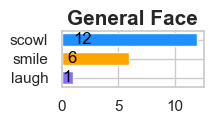

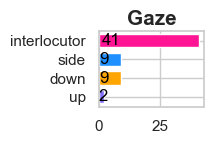

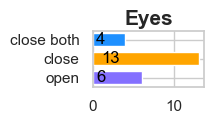

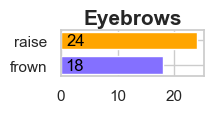

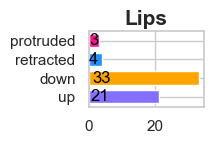

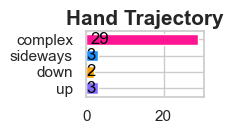

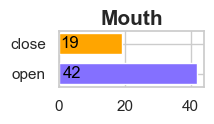

In [68]:
import panel as pn
import matplotlib.pyplot as plt

pn.extension('matplotlib')

# Create a dictionary of accuracy values for deceptive and truthful faces
accuracy_data = {
    'deceptive': {
        'face_emotions': {
            'laugh': 1,
            'smile': 6,
            'scowl': 12
        },
        'eye_gestures': {
            'frown': 18,
            'raise': 24
        },
        'eyebrow_gestures': {
            'open': 6,
            'close': 13,
            'close both': 4
        },
        'gaze_gestures': {
            'up': 2,
            'down': 9,
            'side': 9,
            'interlocutor': 41
        },
        'lips_gestures': {
            'up': 21,
            'down': 33,
            'retracted': 4,
            'protruded': 3
        },
        'hands_gestures': {
            'up': 3,
            'down': 2,
            'sideways': 3,
            'complex': 29
        },
        'mouth_gestures': {
            'open': 42,
            'close': 19
        }
    },
    'truthful': {
        'face_emotions': {
            'laugh': 0,
            'smile': 9,
            'scowl': 14
        },
        'eye_gestures': {
            'frown': 7,
            'raise': 37
        },
        'eyebrow_gestures': {
            'open': 7,
            'close': 35,
            'close both': 1
        },
        'gaze_gestures': {
            'up': 3,
            'down': 11,
            'side': 11,
            'interlocutor': 35
        },
        'lips_gestures': {
            'up': 7,
            'down': 52,
            'retracted': 0,
            'protruded': 1
        },
        'hands_gestures': {
            'up': 16,
            'down': 2,
            'sideways': 2,
            'complex': 10
        },
        'mouth_gestures': {
            'open': 50,
            'close': 10
        }
    }
}

# Define a function to plot the data
def plot_gestures_accuracy(face_type, gestures_data, xlabel,figsize):
    fig, ax = plt.subplots(figsize=figsize)
    gestures = list(gestures_data.keys())
    values = [gestures_data[gesture] for gesture in gestures]
    #colors = ['#8470FF', '#f47e7a', '#dbbaa7', '#98F5FF', '#32CD32', '#8B008B', '#D8BFD8', '#BC8F8F', '#f47e7a', '#6495ED', '#00EEEE', '#dbbaa7', '#778899', '#00FA9A', '#97FFFF', '#CAFF70', '#7FFF00', '#00FFFF', '#dbbaa7', '#FFB6C1', '#ADFF2F', '#F08080']
    colors = ['#8470FF', '#FFA500', '#1E90FF', '#FF1493', '#ADFF2F', '#F08080', '#32CD32']
    ax.barh(gestures, values, color=colors, height=0.7)
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(xlabel, weight='bold').set_fontsize('15')
    max_value = max(values)  # Maximum value for normalization
    normalized_values = [value / max_value for value in values]
    for i, v in enumerate(values):
        ax.text(normalized_values[i] + 0.01, i, str(v), color='black', va='center')
    plt.tight_layout()
    plt.show()
    return fig

# Create a single dropdown widget for selecting the face type
face_type_widget = pn.widgets.Select(options=list(accuracy_data.keys()), name='', width=250)

# Define the interactive function using the selected face type
@pn.depends(face_type=face_type_widget.param.value)
def interactive_plotv1(face_type):
    face_emotions = accuracy_data.get(face_type, {}).get('face_emotions', {})
    eye_gestures = accuracy_data.get(face_type, {}).get('eye_gestures', {})
    eyebrow_gestures = accuracy_data.get(face_type, {}).get('eyebrow_gestures', {})
    gaze_gestures = accuracy_data.get(face_type, {}).get('gaze_gestures', {})
    lips_gestures = accuracy_data.get(face_type, {}).get('lips_gestures', {})
    hands_gestures = accuracy_data.get(face_type, {}).get('hands_gestures', {})
    mouth_gestures = accuracy_data.get(face_type, {}).get('mouth_gestures', {})
    
    fig1 = plot_gestures_accuracy(face_type, face_emotions, 'General Face',(2.3, 1.4))
    fig2 = plot_gestures_accuracy(face_type, gaze_gestures, 'Gaze',(2.3, 1.6))
    fig3 = plot_gestures_accuracy(face_type, eyebrow_gestures, 'Eyes',(2.3, 1.4))
    fig4 = plot_gestures_accuracy(face_type, eye_gestures, 'Eyebrows',(2.3, 1.3))
    fig5 = plot_gestures_accuracy(face_type, lips_gestures, 'Lips',(2.3, 1.6))
    fig6 = plot_gestures_accuracy(face_type, hands_gestures, 'Hand Trajectory',(2.3, 1.5))
    fig7 = plot_gestures_accuracy(face_type, mouth_gestures, 'Mouth',(2.3, 1.4))

    return pn.Column(
        #'# Accuracy of Face Emotions',
        fig1,
        #'# Accuracy of Eye Gestures',
        fig2,
        #'# Accuracy of Eyebrow Gestures',
        fig3,
        #'# Accuracy of Gaze Gestures',
        fig4,
        #'# Accuracy of Lips Gestures',
        fig5,
        #'# Accuracy of Hand Gestures',
        fig6,
        #'# Accuracy of Mouth Gestures',
        fig7
    )

# Create the dashboard layout
dashboard = pn.Column(
    pn.Row(face_type_widget),
    interactive_plotv1
)



In [69]:
#Layout using Template


# Define the title and details
title = "LieVis"
details = "# LieVis Details: Identifying and explaining suicidal thoughts can be challenging as it relies on various factors, including interpreting ambiguous language related to suicide, distinguishing it from non-suicidal language, and evaluating the severity of the ideation before determining if the text is non-suicidal."

# Define the CSS styles
css_styles = {
    "title": {
        "text-align": "center"
    },
    "details": {
        "text-align": "justify"
    }
}

# Create the Markdown components with CSS styles
markdown_title = pn.pane.Markdown(f"## {title}", style=css_styles["title"])
markdown_details = pn.pane.Markdown(details, style=css_styles["details"])



# Define the layout of the panel

layout = pn.Row( 
    
    pn.Tabs(
    ("Dashboard", pn.Column(
    pn.Row(
        pn.Column(plot_pane4),
        pn.Column(plot_pane)
    ),
    pn.Row(
        pn.Column(
            yaxis_co2,
            pn.pane.Markdown("## (C) Result Table "),
            year_slider,
            co2_table.panel(width=1000)
        ),
        pn.Column(
            pn.Column(interactive_plot, width=2000, margin=(0, 45))
        )
    )
)),
        ("Document", pn.pane.Markdown()),
        ("About", pn.pane.Markdown("")
        #pn.pane.Markdown("#### LieVis Details: Identifying and explaining suicidal thoughts can be challenging as it relies on various factors, including interpreting ambiguous language related to suicide, distinguishing it from non-suicidal language, and evaluating the severity of the ideation before determining if the text is non-suicidal.")) 
        )
        #("About", pn.Column(
         #  markdown_title,
         #  markdown_details
        # )),
    
    
    
    )
)


interactive_plot_column = pn.Column(dashboard, width=2000, margin=(0, 15))

#interactive_plot_column13 = pn.Column(interactive_plot7, width=2000, margin=(0, 15))

template = pn.template.FastListTemplate(
    title='LieVis - Lie Detection Result Visualization',
    
     
   sidebar=[
         
             pn.pane.Markdown("## Descriptive Analysis"), interactive_plot_column

             ],

    main=layout
)



In [65]:
#Layout using Template


# Define the title and details
title = "LieVis"
details = "# LieVis Details: Identifying and explaining suicidal thoughts can be challenging as it relies on various factors, including interpreting ambiguous language related to suicide, distinguishing it from non-suicidal language, and evaluating the severity of the ideation before determining if the text is non-suicidal."

# Define the CSS styles
css_styles = {
    "title": {
        "text-align": "center"
    },
    "details": {
        "text-align": "justify"
    }
}

# Create the Markdown components with CSS styles
markdown_title = pn.pane.Markdown(f"## {title}", style=css_styles["title"])
markdown_details = pn.pane.Markdown(details, style=css_styles["details"])



# Define the layout of the panel

layout = pn.Row( 
    
    pn.Tabs(
    ("Dashboard", pn.Column(
    pn.Row(
        pn.Column(plot_pane4),
        pn.Column(plot_pane)
    ),
    pn.Row(
        pn.Column(
            yaxis_co2,
            pn.pane.Markdown("## (C) Result Table "),
            year_slider,
            co2_table.panel(width=1000)
        ),
        pn.Column(
            pn.Column(interactive_plot, width=2000, margin=(0, 45))
        )
    )
)),
        ("Document", pn.pane.Markdown()),
        ("About", pn.pane.Markdown("")
        #pn.pane.Markdown("#### LieVis Details: Identifying and explaining suicidal thoughts can be challenging as it relies on various factors, including interpreting ambiguous language related to suicide, distinguishing it from non-suicidal language, and evaluating the severity of the ideation before determining if the text is non-suicidal.")) 
        )
        #("About", pn.Column(
         #  markdown_title,
         #  markdown_details
        # )),
    
    
    
    )
)
           


template = pn.template.FastListTemplate(
    title='Lie Detection Result Visualization',
    
    
   sidebar=[
             pn.pane.Markdown("## LieVis Details"), 
             pn.pane.Markdown("#### With the prevalence of lying increasing across various fields including law enforcement, education, healthcare, government agencies, border crossings, military screenings, regular job screenings, telecommunications, as well as informants stationed at embassies and consulates worldwide, the development of a comprehensive lie detection model becomes crucial. To address this need, we have introduced an interactive visualization dashboard named 'LieVis'. This specially designed dashboard allows users to thoroughly explore and analyze the results obtained from machine learning (ML) and deep learning (DL) techniques. By providing the capability to delve deeply into ML and DL results, LieVis empowers users to gain comprehensive insights and understanding of the data.")
      # LieVis Details: Identifying and explaining suicidal thoughts can be challenging as it relies on various factors, including interpreting ambiguous language related to suicide, distinguishing it from non-suicidal language, and evaluating the severity of the ideation before determining if the text is non-suicidal.")      pn.pane.Markdown("#### With the prevalence of lying increasing across various fields including law enforcement, education, healthcare, government agencies, border crossings, military screenings, regular job screenings, telecommunications, as well as informants stationed at embassies and consulates worldwide, the development of a comprehensive lie detection model becomes crucial. To address this need, we have introduced an interactive visualization dashboard named "LieVis." This specially designed dashboard allows users to thoroughly explore and analyze the results obtained from ML and DL techniques. By providing the capability to delve deeply into ML and DL results, LieVis empowers users to gain comprehensive insights and understanding of the data.") 
            # pn.pane.PNG('climate_day.png', sizing_mode='scale_both'),
             ],

    main=layout
)



In [121]:
pn.serve(template, 8080)

Launching server at http://localhost:50626
